<a href="https://colab.research.google.com/github/petushok08/YA_ML/blob/main/TA_ml_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Загрузка и подготовка данных

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#Подготовка данных

In [3]:
print("Форма данных:")
print(f"x_train: {x_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_test: {y_test.shape}")

Форма данных:
x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


Нормализуем значения пикселей от 0-255 к диапазону 0-1 для улучшения обучения

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

Преобразуем числовые метки в one-hot encoding для работы с категориальными данными

In [5]:
y_train_categorical = keras.utils.to_categorical(y_train, 10)
y_test_categorical = keras.utils.to_categorical(y_test, 10)

In [8]:
x_train_split, x_val, y_train_split, y_val = train_test_split(x_train, y_train_categorical, test_size=0.2, random_state=42, stratify=y_train)



In [9]:
print(f"\nПосле разделения:")
print(f"x_train: {x_train_split.shape}")
print(f"x_val: {x_val.shape}")
print(f"x_test: {x_test.shape}")


После разделения:
x_train: (48000, 28, 28)
x_val: (12000, 28, 28)
x_test: (10000, 28, 28)


#Визуализация данных

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Визиализируем некоторые картинки

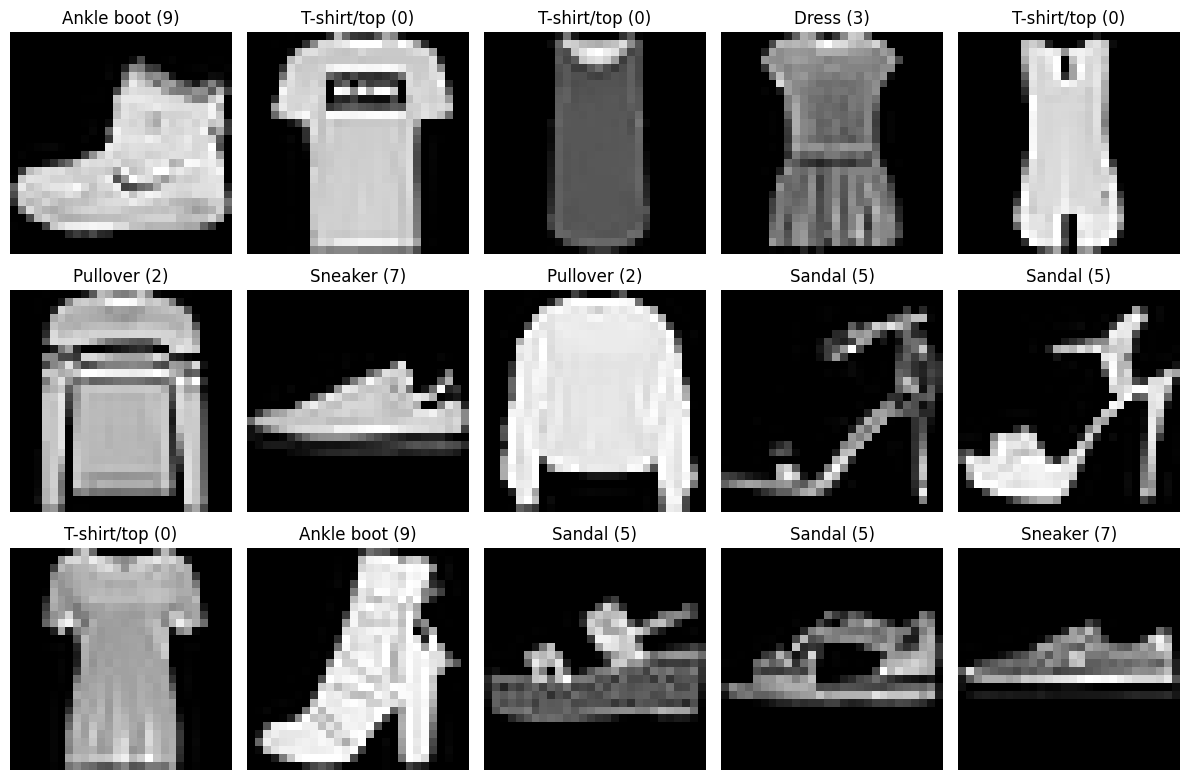

In [12]:
plt.figure(figsize=(12, 8))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'{class_names[y_train[i]]} ({y_train[i]})')
    plt.axis('off')
plt.tight_layout()
plt.show()


#Создание модели

In [13]:
model = keras.Sequential([

    layers.Flatten(input_shape=(28, 28)),


    layers.Dense(512, activation='relu'),


    layers.Dropout(0.3),


    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),


    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),


    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
